# Evaluation of Boundaries

## Data from the GT and TOC-based PageParser

In [1]:
from collections import defaultdict
import json
import os
from nltk.metrics.segmentation import pk, windowdiff

pks = {}
wd = {}
# Calculate the average segment length
def average_segment_length(boundaries):
    return len(boundaries) / boundaries.count(1)


# Step 1: Construct segments_all for gt
for file in os.listdir("./data/gt_segments/"):
    print(file)
    if file.endswith(".json")and file !="segments_access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace.json":
        with open(os.path.join("./data/gt_segments/", file), "r", encoding='utf-8-sig') as f:
            segments_data = json.load(f)

        segments_all_gt = ""

        # Iterate over segments_data to construct the segments_all_gt string
        for s in segments_data:
            if s and "content" in s.keys():
                for text in s["content"]:
                    if text is not None:  # Ensure text is not None
                        segments_all_gt += text.replace(" ", "")
                    segments_all_gt += "§&?"

        # Step 2: Construct segments_all for the JSON formatted data
        if file in os.listdir("./toc-based-page-parser/segments/"):
            with open(os.path.join("./toc-based-page-parser/segments/", file), "r", encoding='utf-8-sig') as f:
                segments_data = json.load(f)

            segments_all_json = ""

            # Iterate over segments_data to construct the segments_all_json string
            try:
                for s in segments_data:
                    if s and "content" in s.keys():
                        for text in s["content"]:
                            if text is not None:  # Ensure text is not None
                                segments_all_json += text.replace(" ", "")
                            segments_all_json += "§&?"
            except AttributeError:
                print(f"AttributeError occurred for file: {file}")
            # Convert segment strings to boundary lists
            def get_boundaries(segment_string, boundary_marker="§&?"):
                boundaries = []
                segments = segment_string.split(boundary_marker)
                for segment in segments[:-1]:  # Exclude the last empty split
                    boundaries.extend([0] * len(segment))
                    boundaries.append(1)  # Append 1 for boundary
                if boundaries:
                    boundaries.pop()  # Remove the last boundary added by split
                return boundaries

            boundaries_gt = get_boundaries(segments_all_gt)
            boundaries_json = get_boundaries(segments_all_json)

            # Pad the shorter list with 0s to make them equal in length
            if len(boundaries_gt) < len(boundaries_json):
                boundaries_gt.extend([0] * (len(boundaries_json) - len(boundaries_gt)))
            elif len(boundaries_json) < len(boundaries_gt):
                boundaries_json.extend([0] * (len(boundaries_gt) - len(boundaries_json)))

            # Convert boundaries to strings
            boundaries_gt_str = [str(b) for b in boundaries_gt]
            boundaries_json_str = [str(b) for b in boundaries_json]

            # Join boundary lists into strings
            boundaries_gt_str = "".join(boundaries_gt_str)
            boundaries_json_str = "".join(boundaries_json_str)
            try:
                # Measure pk metric
                avg_seg_len_gt = average_segment_length(boundaries_gt)
                avg_seg_len_json = average_segment_length(boundaries_json)
                # Set k to the average of the average segment lengths
                k = int((avg_seg_len_gt + avg_seg_len_json) /2)
            except ZeroDivisionError:
                print(f"ZeroDivisionError occurred for file: {file}")
                k=5    #k = 5  # Adjust k value as needed
            
            pk_score = pk(boundaries_gt_str, boundaries_json_str, k=k)
            print("Pk metric:", pk_score)
            pks[file[9:-5]] = pk_score
            
            

            # Measure windowdiff
            wd_score = windowdiff(boundaries_gt_str, boundaries_json_str, k=k)
            print("WindowDiff metric:", wd_score)
            wd[file[9:-5]] = wd_score

        else:
            print("Comparison file not present, will continue.")

segments_brexit-and-the-future-of-eu-politics-a-constitutional-law-perspective.json
Pk metric: 0.0
WindowDiff metric: 0.0
segments_the-endangered-species-act-history-implementation-successes-and-controversies.json
Pk metric: 0.3518868242673591
WindowDiff metric: 0.5210518328668263
segments_a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu.json
Pk metric: 0.0
WindowDiff metric: 0.0
segments_the-future-of-the-law-of-the-sea-bridging-gaps-between-national-individual-and-common-interests.json
Pk metric: 0.2781734601270568
WindowDiff metric: 0.45245235370713804
segments_advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide.json
Pk metric: 0.999820968661843
WindowDiff metric: 1.0
segments_the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati.json
Pk metric: 0.0
WindowDiff metric: 0.0
segments_analogy-and-exemplary-reasoning-in-legal-discourse.js

## Collecting GT Heading Level Information for the Level-Based Segmentation Evaluation

In [2]:
import string
import traceback
from collections import defaultdict
import os

depth_dict={}
maxi=defaultdict(list)
for f in sorted(os.listdir("./data/GT_TOCs/")):
    if f.endswith(".toc") and str("segments_"+f[:-4]+".json") in os.listdir("./toc-based-page-parser/segments/"): 
        print(f[:-4])
        try:
            gt_list=[]
            with open(str("./data/GT_TOCs/"+f), "r", encoding='utf-8-sig') as toc:
                gt_toc=toc.readlines()
          
                
                maximum=0
                for gt in gt_toc:
                    if int(gt.split(",")[0])>maximum:
                        maximum=int(gt.split(",")[0])
                    
           
            depth_dict[f[:-4]]=maximum
            maxi[maximum].append(f[:-4])
        except Exception:
            print(traceback.format_exc())
            print("fail")
            #input()

6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
a-kind-of-mending-restorative-justice-in-the-pacific-islands
access-controlled-the-shaping-of-power-rights-and-rule-in-cyberspace
access-to-justice-and-legal-empowerment-making-the-poor-central-in-legal-development-co-operati
access-to-knowledge-in-the-age-of-intellectual-property
accountability-and-the-law-rights-authority-and-transparency-of-public-power
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
agriculture-and-food-security-in-china-what-effect-wto-accession-and-regional-trade-arrangements
al-haq-a-global-history-of-the-first-palestinian-human-rights-organizati
amicus-curiae-before-international-courts-and-tribunals
analogy-and-exemplary-reasoning-in-legal-discourse
antitrust-enforcement-and-standard-essential-patents-movin

In [3]:
#Calculating metrics wd and pk for the files according to their maximum hierarchy level
wd2=[]
pks2=[]
wd3=[]
pks3=[]
wd4=[]
pks4=[]
wd5=[]
pks5=[]
wd6=[]
pks6=[]
wd7=[]
pks7=[]

for f in maxi[2]:
    if f in wd.keys() and  f in pks.keys():
        wd2.append(wd[f]) 
        pks2.append(pks[f]) 
for f in maxi[3]:
    if f in wd.keys() and  f in pks.keys():
        wd3.append(wd[f]) 
        pks3.append(pks[f]) 
for f in maxi[4]:
    if f in wd.keys() and  f in pks.keys():
        wd4.append(wd[f]) 
        pks4.append(pks[f]) 
for f in maxi[5]:
    if f in wd.keys() and  f in pks.keys():
        wd5.append(wd[f]) 
        pks5.append(pks[f]) 
for f in maxi[6]:
    if f in wd.keys() and  f in pks.keys():
        wd6.append(wd[f]) 
        pks6.append(pks[f]) 
for f in maxi[7]:
    if f in wd.keys() and  f in pks.keys():
        wd7.append(wd[f]) 
        pks7.append(pks[f]) 
print(wd2)
print(pks2)
print(wd7)
print(pks7)


[0.1162742019884877, 0.09282023873151612]
[0.1162742019884877, 0.09282023873151612]
[0.0, 0.437198183779031, 0.34285006605019813, 0.38159021317970077, 1.0, 0.0, 0.0]
[0.0, 0.32617102976431717, 0.25456984808454425, 0.22869291384289425, 0.9949474259183395, 0.0, 0.0]


## Data from pdfstructure

In [4]:
def get_boundaries(segment_string, boundary_marker="§&?"):
                boundaries = []
                segments = segment_string.split(boundary_marker)
                for segment in segments[:-1]:  # Exclude the last empty split
                    boundaries.extend([0] * len(segment))
                    boundaries.append(1)  # Append 1 for boundary
                if boundaries:
                    boundaries.pop()  # Remove the last boundary added by split
                return boundaries
    
pks_pdf={}
wd_pdf={}

for file in os.listdir("./data/gt_segments/"):
    print(file[9:-5])
    if file[9:-5]+".txt" in os.listdir("./pdfstructure-master/hierarchies/"):
        with open(str('./pdfstructure-master/hierarchies/'+file[9:-5]+".txt")) as f:
            content = f.read().strip()  # read content from file and remove whitespaces around
            mylist = eval(content)

        segments_all_pdf = ""
        segments = defaultdict(list)
        for m in mylist:
            segments[m[0]].append([m[1], m[2]])
            if m[1] is not None and m[2] is not None:  # Ensure m[1] and m[2] are not None
                segments_all_pdf += str(m[1].replace(" ", "") + m[2].replace(" ", "") + "§&?")
        
        
        boundaries_gt = get_boundaries(segments_all_gt)            
        boundaries_pdf = get_boundaries(segments_all_pdf)
        
        # Pad the shorter list with 0s to make them equal in length
        if len(boundaries_gt) < len(boundaries_pdf):
            boundaries_gt.extend([0] * (len(boundaries_pdf) - len(boundaries_gt)))
        elif len(boundaries_pdf) < len(boundaries_gt):
            boundaries_pdf.extend([0] * (len(boundaries_gt) - len(boundaries_pdf)))
    
        # Convert boundaries to strings
        boundaries_gt_str = [str(b) for b in boundaries_gt]
        boundaries_pdf_str = [str(b) for b in boundaries_pdf]
    
        # Join boundary lists into strings
        boundaries_gt_str = "".join(boundaries_gt_str)
        boundaries_pdf_str = "".join(boundaries_pdf_str)
        try:
            avg_seg_len_pdf = average_segment_length(boundaries_pdf)
            avg_seg_len_gt = average_segment_length(boundaries_gt)
            # Measure pk metric
            # Set k to the average of the average segment lengths
            k = int((avg_seg_len_gt + avg_seg_len_pdf) /2)
        except ZeroDivisionError:
                print(f"ZeroDivisionError occurred for file: {file}")
                k=5    #k = 5  # Adjust k value as needed#k = 5  # Adjust k value as needed
        
        pk_score = pk(boundaries_gt_str, boundaries_pdf_str, k=k)
        print("Pk metric:", pk_score)
        pks_pdf[file[9:-5]] = pk_score
        
    
        # Measure windowdiff
        wd_score = windowdiff(boundaries_gt_str, boundaries_pdf_str, k=k)
        print("WindowDiff metric:", wd_score)
        wd_pdf[file[9:-5]] = wd_score
    
    else:
        print("Comparison file not present, will continue.")
        #input()


brexit-and-the-future-of-eu-politics-a-constitutional-law-perspective
Pk metric: 0.432745937171742
WindowDiff metric: 0.5213572122015502
the-endangered-species-act-history-implementation-successes-and-controversies
Pk metric: 0.4838679469925808
WindowDiff metric: 0.5433153449147713
a-bird-that-flies-with-two-wings-kastom-and-state-justice-systems-in-vanuatu
Pk metric: 0.37489825609341854
WindowDiff metric: 0.415447128418435
the-future-of-the-law-of-the-sea-bridging-gaps-between-national-individual-and-common-interests
Pk metric: 0.32229076479610025
WindowDiff metric: 0.3826228552920175
advancing-equality-how-constitutional-rights-can-make-a-difference-worldwide
Comparison file not present, will continue.


the-principle-of-purpose-limitation-in-data-protection-laws-the-risk-based-approach-principles-and-private-standards-as-elements-for-regulating-innovati
Pk metric: 0.19225381099212166
WindowDiff metric: 0.26961604841097336
analogy-and-exemplary-reasoning-in-legal-discourse
Pk metric: 0.36146462481653224
WindowDiff metric: 0.5106443777682526
aegis-or-achilles-heel-the-dilemma-of-homology-in-biopatents-in-the-wake-of-novozymes
Pk metric: 0.5984623639686771
WindowDiff metric: 1.0
reconsidering-constitutional-formation-i-national-sovereignty-a-comparative-analysis-of-the-juridification-by-constituti
Pk metric: 0.3785314171529653
WindowDiff metric: 0.43462227817061244
second-generation-patents-in-pharmaceutical-innovati
Pk metric: 0.4302667661079984
WindowDiff metric: 0.48972479183630396
boats-to-burn-bajo-fishing-activity-in-the-australian-fishing-zone
Pk metric: 0.42189808508046206
WindowDiff metric: 0.5282918563311958
administrative-decision-making-in-australian-migration-l
Pk metric: 0.

6-traditional-medicines-law-and-the-dis-ordering-of-temporalities
Pk metric: 0.9973729578852311
WindowDiff metric: 1.0
the-constitution-and-governance-in-camer
Pk metric: 0.4848860816602752
WindowDiff metric: 0.5642612519445364
intellectual-property-in-the-global-arena-jurisdiction-applicable-law-and-the-recognition-of-judgments-in-europe-japan-and-the-us
Pk metric: 0.4002472501812923
WindowDiff metric: 0.4349063524196621
climate-change-and-international-shipping-the-regulatory-framework-for-the-reduction-of-greenhouse-gas-emissions
Pk metric: 0.33213913419653757
WindowDiff metric: 0.38966427008894694
applying-shari-a-in-the-west-facts-fears-and-the-future-of-islamic-rules-on-family-relations-in-the-west
Pk metric: 0.4103224242662461
WindowDiff metric: 0.4587785971997714
the-role-of-the-patent-system-in-stimulating-innovation-and-technology-transfer-for-climate-change-including-aspects-of-licensing-and-competition-l
Pk metric: 0.6236317015710213
WindowDiff metric: 0.8862148407502375
un

In [5]:
#Calculating metrics wd and pk for the files according to their maximum hierarchy level

#print(maxi[2])
wd_pdf2=[]
pks_pdf2=[]
wd_pdf3=[]
pks_pdf3=[]
wd_pdf4=[]
pks_pdf4=[]
wd_pdf5=[]
pks_pdf5=[]
wd_pdf6=[]
pks_pdf6=[]
wd_pdf7=[]
pks_pdf7=[]

for f in maxi[2]:
    if f in wd_pdf.keys() and  f in pks_pdf.keys():
        wd_pdf2.append(wd_pdf[f]) 
        pks_pdf2.append(pks_pdf[f]) 
for f in maxi[3]:
    if f in wd_pdf.keys() and  f in pks_pdf.keys():
        wd_pdf3.append(wd_pdf[f]) 
        pks_pdf3.append(pks_pdf[f]) 
for f in maxi[4]:
    if f in wd_pdf.keys() and  f in pks_pdf.keys():
        wd_pdf4.append(wd_pdf[f]) 
        pks_pdf4.append(pks_pdf[f]) 
for f in maxi[5]:
    if f in wd_pdf.keys() and f in pks_pdf.keys():
        wd_pdf5.append(wd_pdf[f]) 
        pks_pdf5.append(pks_pdf[f]) 
for f in maxi[6]:
    if f in wd_pdf.keys() and f in pks_pdf.keys():
        wd_pdf6.append(wd_pdf[f]) 
        pks_pdf6.append(pks_pdf[f]) 
for f in maxi[7]:
    if f in wd_pdf.keys() and f in pks_pdf.keys():
        wd_pdf7.append(wd_pdf[f]) 
        pks_pdf7.append(pks_pdf[f]) 
print(wd_pdf2)
print(pks_pdf2)
print(wd_pdf7)
print(pks_pdf7)

[1.0, 1.0]
[0.9973729578852311, 0.7463921426974216]
[0.5138102097369084, 0.530862358168079, 0.4349063524196621, 0.4040150774348302, 0.33998673997509266, 0.5495968048794925, 0.26961604841097336]
[0.46821326374400085, 0.45888924973466677, 0.4002472501812923, 0.3355397872109253, 0.3115777339095272, 0.5084533335588182, 0.19225381099212166]


## Visualizing Segmentation Evaluation Results

/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sabine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

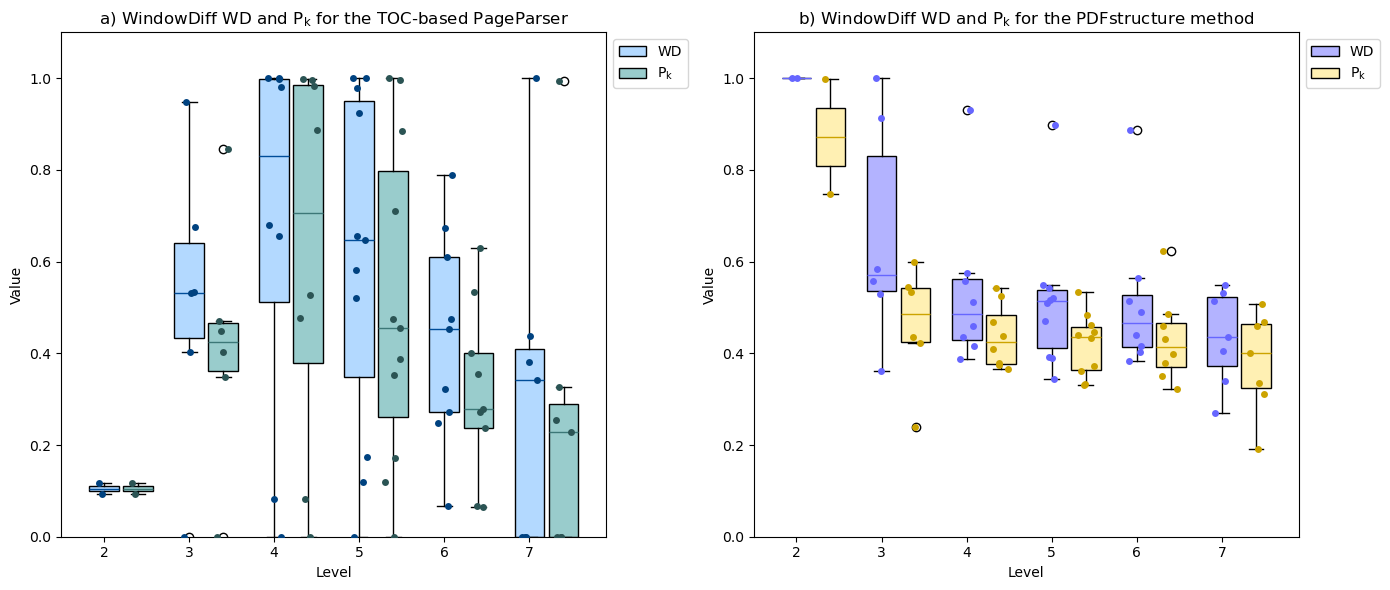

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

plt.rcParams.update({'mathtext.default':  'regular' })

# Define precision and tolprecision dictionaries
precision = {
    '2': wd2,
    '3': wd3,
    '4': wd4,
    '5': wd5,
    '6': wd6,
    '7': wd7
}

tolprecision = {
    '2': pks2,
    '3': pks3,
    '4': pks4,
    '5': pks5,
    '6': pks6,
    '7': pks7
}

# Define recall and tolrecall dictionaries
recall = {
    '2': wd_pdf2,
    '3': wd_pdf3,
    '4': wd_pdf4,
    '5': wd_pdf5,
    '6': wd_pdf6,
    '7': wd_pdf7
}

tolrecall = {
    '2': pks_pdf2,
    '3': pks_pdf3,
    '4': pks_pdf4,
    '5': pks_pdf5,
    '6': pks_pdf6,
    '7': pks_pdf7
}

# Grouping levels
levels = ['2', '3', '4', '5', '6', '7']

# Data for boxplots
precision_data = [precision[level] for level in levels]
tolprecision_data = [tolprecision[level] for level in levels]
recall_data = [recall[level] for level in levels]
tolrecall_data = [tolrecall[level] for level in levels]

# Debugging: print the contents of precision_data and tolprecision_data
#print(f"precision_data: {precision_data}")
#print(f"tolprecision_data: {tolprecision_data}")

# Flatten the precision and tolprecision data
precision_data_flat = [val for sublist in precision_data for val in sublist]
tolprecision_data_flat = [val for sublist in tolprecision_data for val in sublist]
recall_data_flat = [val for sublist in recall_data for val in sublist]
tolrecall_data_flat = [val for sublist in tolrecall_data for val in sublist]

# Create DataFrames for Seaborn stripplot
precision_df = pd.DataFrame({'Level': np.repeat(levels, [len(data) for data in precision_data]), 'Value': precision_data_flat})
tolprecision_df = pd.DataFrame({'Level': np.repeat(levels, [len(data) for data in tolprecision_data]), 'Value': tolprecision_data_flat})
recall_df = pd.DataFrame({'Level': np.repeat(levels, [len(data) for data in recall_data]), 'Value': recall_data_flat})
tolrecall_df = pd.DataFrame({'Level': np.repeat(levels, [len(data) for data in tolrecall_data]), 'Value': tolrecall_data_flat})


# Define custom facecolors using HTML color codes
precision_facecolor = '#b3d9ff'  # Light Blue
tolprecision_facecolor = '#99cccc'  # Light Bluegreen
recall_facecolor = '#b3b3ff'  # Light purple
tolrecall_facecolor = '#fff0b3'  # Light orange
edgecolor = 'black'  # Black outline color

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Precision
precision_boxes = ax1.boxplot(precision_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=precision_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolprecision_boxes = ax1.boxplot(tolprecision_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolprecision_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for precision
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in precision_data]), y=precision_data_flat, native_scale=True, color='#004280', ax=ax1, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolprecision_data]), y=tolprecision_data_flat, native_scale=True, color='#2b5454', ax=ax1, jitter=True, size=5)


# Set y-axis limits
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('Level')
ax1.set_xticks(range(2, len(levels) + 2))
ax1.set_xticklabels(levels)
ax1.set_ylabel('Value')
ax1.set_title('a) WindowDiff $WD$ and $P_{k}$ for the TOC-based PageParser')

# Create legend
precision_patch = mpatches.Patch(facecolor=precision_facecolor, edgecolor=edgecolor, label='WD')
tolprecision_patch = mpatches.Patch(facecolor=tolprecision_facecolor, edgecolor=edgecolor, label='$P_{k}$')
ax1.legend(handles=[precision_patch, tolprecision_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in precision_boxes['medians']:
    median.set(color='#004d99')
for median in tolprecision_boxes['medians']:
    median.set(color='#3c7777')

# Plot for Recall
recall_boxes = ax2.boxplot(recall_data, positions=range(2, len(levels) + 2), widths=0.35, patch_artist=True, boxprops=dict(facecolor=recall_facecolor, edgecolor=edgecolor), medianprops=dict(color='blue'))
tolrecall_boxes = ax2.boxplot(tolrecall_data, positions=[x + 0.4 for x in range(2, len(levels) + 2)], widths=0.35, patch_artist=True, boxprops=dict(facecolor=tolrecall_facecolor, edgecolor=edgecolor), medianprops=dict(color='red'))

# Overlay stripplot for recall
sns.stripplot(x=np.repeat(range(2, len(levels) + 2), [len(data) for data in recall_data]), y=recall_data_flat, native_scale=True, color='#6666ff', ax=ax2, jitter=True, size=5)
sns.stripplot(x=np.repeat([x + 0.4 for x in range(2, len(levels) + 2)], [len(data) for data in tolrecall_data]), y=tolrecall_data_flat, native_scale=True, color='#cca300', ax=ax2, jitter=True, size=5)

# Set y-axis limits
ax2.set_ylim(0, 1.1)
ax2.set_xlabel('Level')
ax2.set_xticks(range(2, len(levels) + 2))
ax2.set_xticklabels(levels)
ax2.set_ylabel('Value')
ax2.set_title('b) WindowDiff $WD$ and $P_{k}$ for the PDFstructure method')

# Create legend
recall_patch = mpatches.Patch(facecolor=recall_facecolor, edgecolor=edgecolor, label='WD')
tolrecall_patch = mpatches.Patch(facecolor=tolrecall_facecolor, edgecolor=edgecolor, label='$P_{k}$')
ax2.legend(handles=[recall_patch, tolrecall_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Change median line colors
for median in recall_boxes['medians']:
    median.set(color='#6666ff')
for median in tolrecall_boxes['medians']:
    median.set(color='#cca300')

plt.tight_layout()
plt.savefig("./combined_wd_pk_results.pdf", format="pdf", bbox_inches="tight")
plt.show()